In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [120]:
df = pd.read_csv('titanic_train.csv',)

In [121]:
df['Cabin'] = df['Cabin'].str.get(0)


In [122]:
df['Fare'] = round(df['Fare'])

In [123]:
from sklearn.preprocessing import LabelEncoder


le_Embarked = LabelEncoder()
le_sex = LabelEncoder()
le_Cabin = LabelEncoder()

df['Embarked_en'] = le_Embarked.fit_transform(df['Embarked'])
df['sex_en'] = le_sex.fit_transform(df['Sex'])
df['Cabin_en'] = le_Cabin.fit_transform(df['Cabin'])


In [125]:
df.drop(['Name','Ticket','Sex','Cabin','Embarked'],axis=1,inplace=True)

In [129]:
age_mean = round(df['Age'].mean())

In [130]:
df['Age'].fillna(age_mean,inplace = True)

In [133]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_en,sex_en,Cabin_en
0,1,0,3,22.0,1,0,7.0,2,1,8
1,2,1,1,38.0,1,0,71.0,0,0,2
2,3,1,3,26.0,0,0,8.0,2,0,8
3,4,1,1,35.0,1,0,53.0,2,0,2
4,5,0,3,35.0,0,0,8.0,2,1,8


In [134]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, df['Survived'], test_size=0.2, random_state=42)

In [180]:
from sklearn.ensemble import RandomForestClassifier


In [181]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [182]:
predict = model.predict(X_test)

In [183]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test,predict)
accuracy

1.0

In [185]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



In [186]:
depth = 5

In [187]:
from sklearn.model_selection import cross_val_score

cross_val_score( DecisionTreeClassifier( max_depth = depth ), df, df['Survived'], cv = 5, scoring = 'accuracy' )

array([1., 1., 1., 1., 1.])

In [188]:
from sklearn.metrics import roc_auc_score

In [189]:
roc_auc_score(y_test,predict)

1.0

In [190]:
from sklearn.metrics import roc_curve

In [191]:
fpr, tpr, thres = roc_curve( y_test, predict )

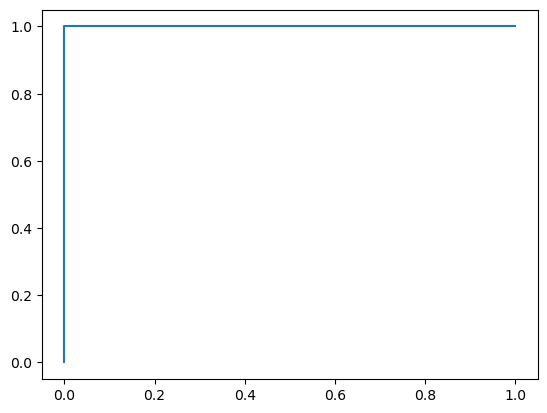

In [192]:
plt.plot(fpr,tpr)